In [1]:
# Just to check the library version (optional)

# import imblearn

# print(imblearn.__version__)

import os
os.listdir('/kaggle/input')
# /kaggle/input/enron-fraud-email-dataset/enron_data_fraud_labeled.csv

['spamdetectionproject', 'enron-fraud-email-dataset', 'vectorizer-files']

In [2]:
# dill.load_session('notebook_env.ipynb')



# Importing necessary libraries

import numpy as np        # For numerical operations

import pandas as pd       # For data manipulation and analysis

import matplotlib.pyplot as plt  # For data visualization

import seaborn as sns

%matplotlib inline



import dill

from imblearn.over_sampling import SMOTE,RandomOverSampler

from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline



import string



# Importing WordCloud for text visualization

from wordcloud import WordCloud



# Importing NLTK for natural language processing

import nltk,imblearn

from nltk.corpus import stopwords    # For stopwords

from nltk.stem.porter import PorterStemmer



# Downloading NLTK data

# nltk.download('stopwords')   # Downloading stopwords data

# nltk.download('punkt')       # Downloading tokenizer data

# # print(nltk.data.path)

# nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize,sent_tokenize

In [3]:
# df = pd.read_csv('emails.csv', encoding='latin1')

df2 = pd.read_csv('/kaggle/input/enron-fraud-email-dataset/enron_data_fraud_labeled.csv')


/tmp/ipykernel_30/4098231165.py:3: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/kaggle/input/enron-fraud-email-dataset/enron_data_fraud_labeled.csv')


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447417 entries, 0 to 447416
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Folder-User                447417 non-null  object 
 1   Folder-Name                447417 non-null  object 
 2   Message-ID                 447417 non-null  object 
 3   Date                       447417 non-null  object 
 4   From                       447417 non-null  object 
 5   To                         447417 non-null  object 
 6   Subject                    429397 non-null  object 
 7   Mime-Version               447417 non-null  object 
 8   Content-Type               447417 non-null  object 
 9   Content-Transfer-Encoding  447417 non-null  object 
 10  X-From                     447417 non-null  object 
 11  X-To                       439238 non-null  object 
 12  X-cc                       109637 non-null  object 
 13  X-bcc                      17

In [5]:
df2.head(3)

pd.set_option('display.max_columns', None)

df2.sample(5)

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,Cc,Bcc,Time,Attendees,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
108695,maildir,weldon-c,<15061972.1075861219394.JavaMail.evans@thyme>,"Wed, 31 Oct 2001 12:08:58 -0800 (PST)",charles.weldon@enron.com,jeff.smith@wachovia.com,RE:,1.0,text/plain; charset=us-ascii,7bit,"Weldon, V. Charles </O=ENRON/OU=NA/CN=RECIPIEN...",'Jeff.Smith@wachovia.com@ENRON',NaN,NaN,"\VWELDON (Non-Privileged)\Weldon, V. Charles\S...",Weldon-C,VWELDON (Non-Privileged).pst,"Call me at home tonight. To: Weldon, V. Charles",,,,,,Enron Data,2c9d262c1fbbf3b45d14abb416d92c3b6bbe230e0fba6f...,False,False,Internal,111.0,False,False,0
266473,maildir,rodrique-r,<934941.1075858371236.JavaMail.evans@thyme>,"Tue, 13 Feb 2001 01:50:00 -0800 (PST)",robin.rodrigue@enron.com,lynn.pikofsky@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Robin Rodrigue,Lynn Pikofsky,NaN,NaN,\Robin_Rodrique_Jun2001\Notes Folders\'sent mail,Rodrique-R,rrodri2.nsf,Re: Thanks. You're the best. Robin,,,,,,Enron Data,b4ca3e59649a3dc403db9b3b046d26263f453cedccfe4b...,False,False,Internal,728.0,False,True,0
228667,maildir,kuykendall-t,<26870342.1075859026253.JavaMail.evans@thyme>,"Tue, 23 Oct 2001 08:11:22 -0700 (PDT)",melba.lozano@enron.com,kristen.clause@enron.com,FW: Testing - Fin Gas spreads,1.0,text/plain; charset=us-ascii,7bit,"Lozano, Melba </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Clause, Kristen </O=ENRON/OU=NA/CN=RECIPIENTS/...","Walker, Chris </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",NaN,"\TKUYKEN (Non-Privileged)\Kuykendall, Tori\Del...",Kuykendall-T,TKUYKEN (Non-Privileged).pst,"Kristin, Please review the attached word docum...","['chris.walker@enron.com', 'tori.kuykendall@en...","chris.walker@enron.com, tori.kuykendall@enron....",,,,Enron Data,3e53667cc1b187ca2d3d989833b2706eee8c07747fcf06...,False,False,Internal,69.0,False,False,0
191777,maildir,beck-s,<30906138.1075855799495.JavaMail.evans@thyme>,"Tue, 2 May 2000 07:53:00 -0700 (PDT)",celeste.roberts@enron.com,"richard.causey@enron.com, sally.beck@enron.com...",NaN,1.0,text/plain; charset=us-ascii,7bit,Celeste Roberts,"Richard Causey, Sally Beck, Brent A Price, Bre...",Charlene Jackson,NaN,\Sally_Beck_Dec2000\Notes Folders\All documents,Beck-S,sbeck.nsf,Rick: Just want to provide a summary of our di...,charlene.jackson@enron.com,charlene.jackson@enron.com,,,,Enron Data,667599c81ab99cd51ca02006edfb2d3db97ef43aa395b4...,False,False,Internal,13.0,False,False,0
328841,maildir,smith-m,<20764457.1075862015742.JavaMail.evans@thyme>,"Wed, 14 Nov 2001 09:19:53 -0800 (PST)",steve.swain@enron.com,matt.smith@enron.com,RE: forecasting model,1.0,text/plain; charset=us-ascii,7bit,"Swain, Steve </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","Smith, Matt </O=ENRON/OU=NA/CN=RECIPIENTS/CN=M...",NaN,NaN,"\MSMITH18 (Non-Privileged)\Smith, Matt\Inbox",Smith-M,MSMITH18 (Non-Privileged).pst,"RE: forecasting model Matt, Are you using regi...",,,,,,Enron Data,2831cb41f04238b131946ef14d6d8b68dde23e46093274...,False,False,Internal,16.0,False,True,0


In [6]:
df2.isnull().sum()

Folder-User                       0
Folder-Name                       0
Message-ID                        0
Date                              0
From                              0
To                                0
Subject                       18020
Mime-Version                      0
Content-Type                      0
Content-Transfer-Encoding         0
X-From                            0
X-To                           8179
X-cc                         337780
X-bcc                        447240
X-Folder                          0
X-Origin                          0
X-FileName                     2690
Body                              0
Cc                                0
Bcc                               0
Time                              0
Attendees                         0
Re                                0
Source                            0
Mail-ID                           0
POI-Present                       0
Suspicious-Folders                0
Sender-Type                 

In [7]:
df2['Label'].value_counts()

newdf = df2.drop(columns = ['X-cc','X-bcc'])


In [8]:
newdf[['Message-ID','Body','Label']]

,Message-ID,Body,Label
0,<17334447.1075857585446.JavaMail.evans@thyme>,Status John: I'm not really sure what happened...,0
1,<19171686.1075857585034.JavaMail.evans@thyme>,re:summer inverses i suck-hope youve made more...,0
2,<29887033.1075857630725.JavaMail.evans@thyme>,"The WTI Bullet swap contracts Hi, Following th...",0
3,<2526360.1075857584903.JavaMail.evans@thyme>,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,0
4,<30102065.1075857630952.JavaMail.evans@thyme>,daily charts and matrices as hot links 5/15 Th...,0
...,...,...,...
447412,<20441369.1075863375765.JavaMail.evans@thyme>,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,0
447413,<18115560.1075863371090.JavaMail.evans@thyme>,Audit Committee Materials meeting Two meetings...,0
447414,<9719707.1075862189729.JavaMail.evans@thyme>,"Credit Story Rick/Bill/David, Generally, we ha...",0
447415,<13468574.1075863381452.JavaMail.evans@thyme>,Commodity Group Limit Issue In addition to the...,0


In [9]:
newdf.columns

Index(['Folder-User', 'Folder-Name', 'Message-ID', 'Date', 'From', 'To',
       'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding',
       'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName', 'Body', 'Cc',
       'Bcc', 'Time', 'Attendees', 'Re', 'Source', 'Mail-ID', 'POI-Present',
       'Suspicious-Folders', 'Sender-Type', 'Unique-Mails-From-Sender',
       'Low-Comm', 'Contains-Reply-Forwards', 'Label'],
      dtype='object')

In [10]:
# # df.iloc[2,1].split('\n')

# from imblearn.over_sampling import RandomOverSampler



# y = newdf['Label']

# X = newdf.drop(columns = ['Label'])

# print(f'Initial shapes x:{X.shape} & y:{y.shape}')





# # Setting the desired oversampling and undersampling strategy

# oversample_ratio = 0.10  # Target 10% spam



# #Define ROS for slight oversampling

# ros = RandomOverSampler(sampling_strategy=oversample_ratio,random_state=42)

# # smote = SMOTE(sampling_strategy=oversample_ratio, random_state=42)

# X, y = ros.fit_resample(X, y)

# print(f'After ROS shapes x:{X.shape} & y:{y.shape}')



# # Step 2: Define RandomUnderSampler to adjust ham class

# minority_count = np.sum(y == 1)

# print(f"Minority - {minority_count}")



# desired_majority_count = int(minority_count * 4.463158) # ~81% to 19% ratio

# rus = RandomUnderSampler(sampling_strategy={0: desired_majority_count, 1: minority_count}, random_state=42)



# X_resampled, y_resampled = rus.fit_resample(X, y)

# print(f'After RUS shapes x:{X_resampled.shape} & y:{y_resampled.shape}')

# X_resampled['Label'] = y_resampled

# data = X_resampled.reset_index(drop=True)

# # data.shape

In [11]:
# df.iloc[2,1].split('\n')

from imblearn.over_sampling import RandomOverSampler



y = newdf['Label']

X = newdf.drop(columns = ['Label'])

print(f'Initial shapes x:{X.shape} & y:{y.shape}')

minority_count = np.sum(y == 1)

print(f"Minority - {minority_count}")

print(f"Ratio of 0s to 1s is :: {minority_count/(np.sum(y == 0))}")

# Setting the desired oversampling and undersampling strategy

oversample_ratio = 0.10  # Target 10% spam

# undersample_ratio = 0.9  # Retain 90% ham after oversampling



#Define ROS for slight oversampling

ros = RandomOverSampler(sampling_strategy=oversample_ratio,random_state=42)

# smote = SMOTE(sampling_strategy=oversample_ratio, random_state=42)

X, y = ros.fit_resample(X, y)

print(f'After ROS shapes x:{X.shape} & y:{y.shape}')



# Step 2: Define RandomUnderSampler to adjust ham class

# rus = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=42)

minority_count = np.sum(y == 1)

print(f"Minority - {minority_count}")

print(f"Ratio of 1s to 0s is :: {minority_count/(np.sum(y == 0))}")

desired_majority_count = int(minority_count * 4.463158) # ~81% to 19% ratio

rus = RandomUnderSampler(sampling_strategy={0: desired_majority_count, 1: minority_count}, random_state=42)



X_resampled, y_resampled = rus.fit_resample(X, y)

print(f'After RUS shapes x:{X_resampled.shape} & y:{y_resampled.shape}')

X_resampled['Label'] = y_resampled

data = X_resampled.reset_index(drop=True)

# data.shape

Initial shapes x:(447417, 29) & y:(447417,)
Minority - 2327
Ratio of 0s to 1s is :: 0.0052281561032600146
After ROS shapes x:(489599, 29) & y:(489599,)
Minority - 44509
Ratio of 1s to 0s is :: 0.1
After RUS shapes x:(243159, 29) & y:(243159,)


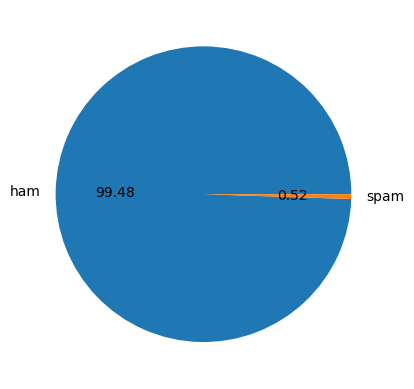

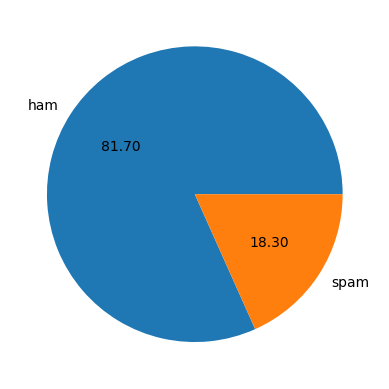

In [73]:
plt.pie(newdf['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

plt.show()

plt.pie(data['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

plt.show()

In [13]:
# newdf.duplicated().sum()

data['num_chars'] = data['Body'].apply(len)

data['num_chars']

# data['Body'][1045]

0           77
1          105
2          311
3           29
4          122
          ... 
243154      49
243155    3059
243156     111
243157     180
243158    1411
Name: num_chars, Length: 243159, dtype: int64

In [14]:
#number of words

# Ran word_tokenize() once :: 10mins

# data['num_words'] = data['Body'].apply(lambda x:len(word_tokenize(x)))

# with open('number_words.pkl','wb') as file:

#     dill.dump(data['num_words'],file)

    

with open('/kaggle/input/spamdetectionproject/number_words.pkl','rb') as file:

    data['num_words'] = dill.load(file)

In [15]:
data['num_words']

# data.iloc[108161]['Body']

0          18
1          26
2          53
3           6
4          26
         ... 
243154     12
243155    633
243156     18
243157     32
243158    284
Name: num_words, Length: 243159, dtype: int64

In [16]:
# data['num_sen'] = data['Body'].apply(lambda x:len(sent_tokenize(x)))

# with open('number_sen.pkl','wb') as file:

#     dill.dump(data['num_sen'],file)



with open('/kaggle/input/spamdetectionproject/number_sen.pkl','rb') as file:

    data['num_sen'] = dill.load(file)

data[['Label','Body','num_words','num_chars','num_sen']]

,Label,Body,num_words,num_chars,num_sen
0,0,"Re: Mid Year PRC Soma, Yes, no problem. Vince ...",18,77,2
1,0,what the heck does that mean? don't call me re...,26,105,4
2,0,Instructions for Exit Interview Michelle Is th...,53,311,4
3,0,"barely To: Underwood, Thomas",6,29,1
4,0,---------------------- Forwarded by Jeffery Fa...,26,122,1
...,...,...,...,...,...
243154,1,This Cell Phone Could Save Your Life ohqri <<URL>,12,49,1
243155,1,Finish your shopping in time for the holidays!...,633,3059,11
243156,1,_____________________________________________...,18,111,4
243157,1,yo bro. this is my new email address. save it....,32,180,5


In [17]:
data[['Body','num_words','num_chars','num_sen']].describe()

,num_words,num_chars,num_sen
count,243159.000000,2.431590e+05,243159.000000
mean,185.586986,9.546119e+02,8.544125
std,1008.697965,5.514358e+03,29.731423
min,0.000000,1.000000e+00,0.000000
25%,27.000000,1.380000e+02,2.000000
50%,59.000000,2.940000e+02,4.000000
75%,161.000000,8.160000e+02,8.000000
max,246922.000000,1.401129e+06,3161.000000


In [18]:
data[data['Label'] == 0][['num_words','num_chars','num_sen']].describe() # Ham emails

,num_words,num_chars,num_sen
count,198650.000000,1.986500e+05,198650.000000
mean,172.961404,8.977859e+02,7.709706
std,1110.659354,6.076791e+03,32.394931
min,0.000000,1.000000e+00,0.000000
25%,25.000000,1.240000e+02,2.000000
50%,46.000000,2.300000e+02,3.000000
75%,111.000000,5.610000e+02,6.000000
max,246922.000000,1.401129e+06,3161.000000


In [19]:
data[data['Label'] == 1][['num_words','num_chars','num_sen']].describe() # spam emails

,num_words,num_chars,num_sen
count,44509.000000,44509.000000,44509.000000
mean,241.936754,1208.234245,12.268260
std,221.672504,1110.529216,11.333722
min,4.000000,23.000000,1.000000
25%,94.000000,492.000000,5.000000
50%,187.000000,931.000000,9.000000
75%,308.000000,1528.000000,15.000000
max,1905.000000,9058.000000,111.000000


In [20]:
spam = data[data['Label'] == 1]

ham = data[data['Label'] == 0]

ham.describe()

c = ham['num_words'].value_counts()

s = spam['num_words'].value_counts()

print(f'{c} \n  {s}')

num_words
26      4049
24      3831
27      3709
30      3581
25      3345
        ... 
6172       1
2062       1
1645       1
5907       1
2734       1
Name: count, Length: 3192, dtype: int64 
  num_words
130     1110
45       366
52       338
72       338
231      312
        ... 
1654      11
1089      10
590        9
786        8
667        6
Name: count, Length: 583, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


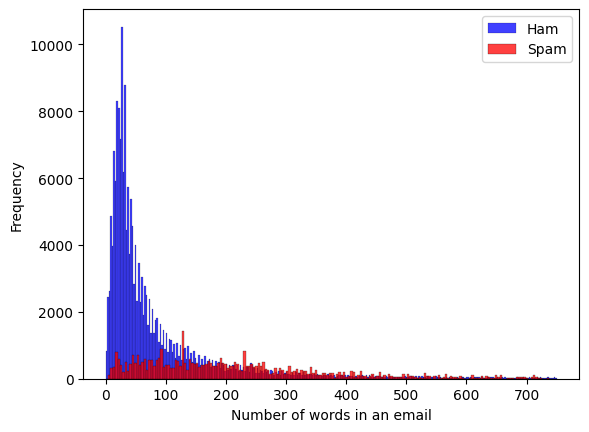

In [21]:
spam = data[data['Label'] == 1]

ham = data[data['Label'] == 0]

sns.histplot(ham['num_words'],label="Ham",color='blue',binrange=(0,750))

sns.histplot(spam['num_words'],label="Spam",color='red',binrange=(0,750),bins=190)

# plt.ylim(0, 3000)

# plt.xlim(0, 30000)

plt.xlabel('Number of words in an email')

plt.ylabel('Frequency')

plt.legend(loc="upper right")

plt.show()

In [22]:
ham['num_words'].describe()

count    198650.000000
mean        172.961404
std        1110.659354
min           0.000000
25%          25.000000
50%          46.000000
75%         111.000000
max      246922.000000
Name: num_words, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


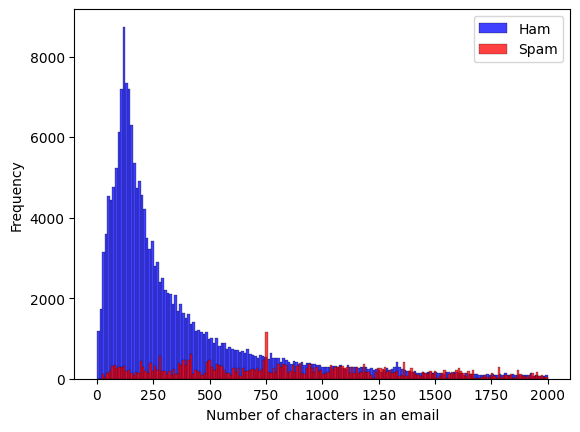

In [23]:
sns.histplot(ham['num_chars'],label="Ham",color='blue',binrange=(0,2000))

sns.histplot(spam['num_chars'],label="Spam",color='red',binrange=(0,2000),bins=190)

# plt.hist(ham['number_words'])

plt.xlabel('Number of characters in an email')

plt.ylabel('Frequency')

plt.legend(loc="upper right")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 800x500 with 0 Axes>

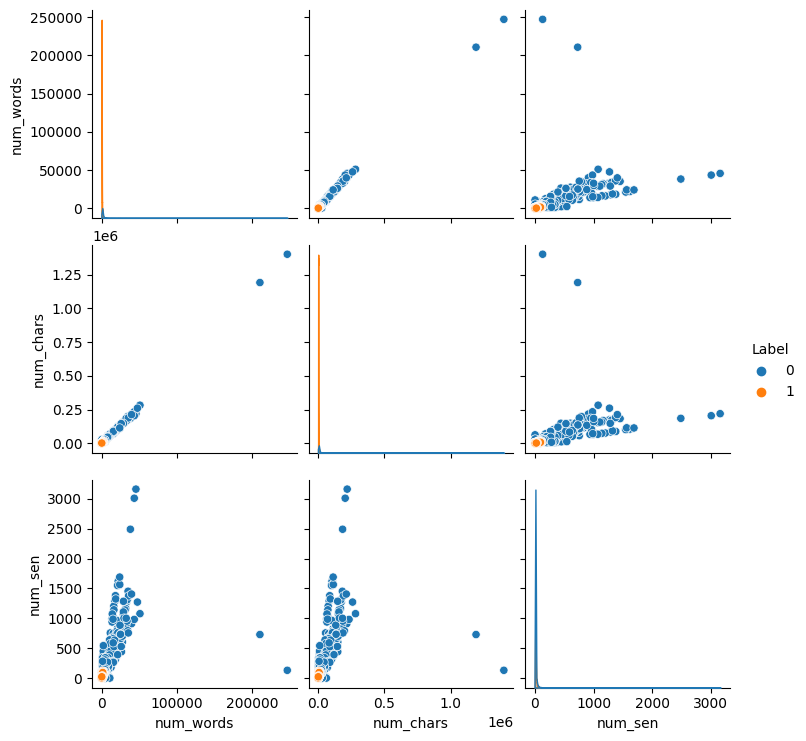

In [24]:
plt.figure(figsize=(8,5))

stats = data[['num_words','num_chars','num_sen','Label']]

pairplot = sns.pairplot(stats,hue='Label')

# Set x-axis limits for each subplot

# for ax in pairplot.axes.flatten():

#     ax.set_xlim(left=0,right=10000)

plt.show()

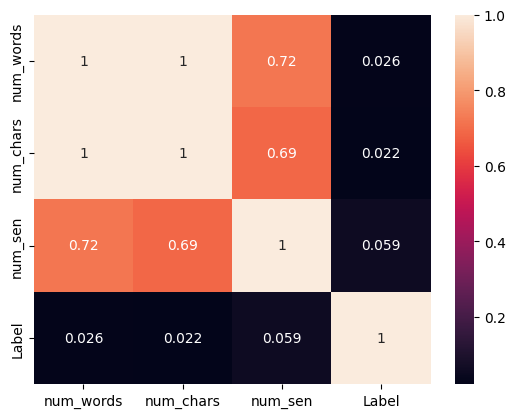

In [25]:
sns.heatmap(stats.corr(),annot=True)

plt.show()

In [26]:
def transformText(text):

    text = text.lower()

    text = nltk.word_tokenize(text)



    y = []

    for i in text:

        if i.isalnum():

            y.append(i)



    text = y[:]

    y.clear()



    for i in text:

        if i not in stopwords.words('english') and i not in string.punctuation:

            y.append(i)

    

    text = y[:]

    y.clear()



    ps = PorterStemmer()

    for i in text:

        y.append(ps.stem(i))

        

    return " ".join(y)

In [12]:
# transformText("Hello, how are you doing ? studied ML courses")

# data['transformed_text'] = data['Body'].apply(transformText) ::: R.T ~ 120mins



# with open('transformedText.pkl','wb') as file:

#     dill.dump(data['transformed_text'],file)



with open('/kaggle/input/spamdetectionproject/transformedText.pkl','rb') as file:

    data['transformed_text'] = dill.load(file)



data['transformed_text'].describe()

count                                                243159
unique                                               140702
top       trade confirm usernam campb54792 electron trad...
freq                                                    899
Name: transformed_text, dtype: object

In [30]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
spam = data[data['Label'] == 1]

ham = data[data['Label'] == 0]

spam_wc = wc.generate(spam['transformed_text'].str.cat(sep = " "))

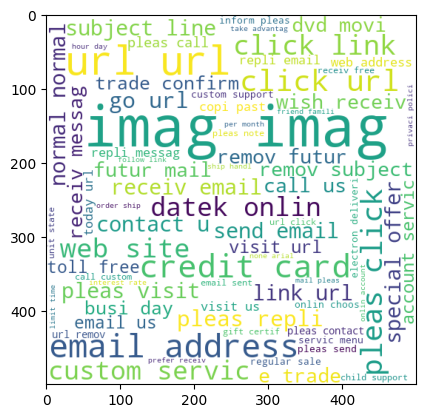

In [32]:
plt.imshow(spam_wc)

plt.show()

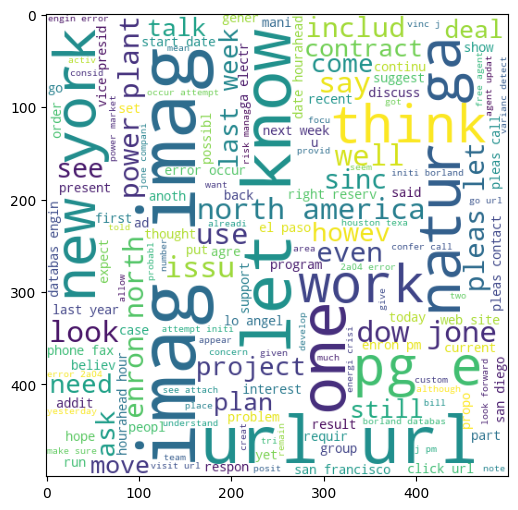

In [33]:
ham_wc = wc.generate(ham['transformed_text'].str.cat(sep = " "))

plt.figure(figsize=(15,6))

plt.imshow(ham_wc)

plt.show()

## Model Building

### Using Bag of Words with Unigrams + Bigrams Combinations

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2))

In [35]:
X = cv.fit_transform(data['transformed_text'])

In [36]:
X.shape

(243159, 3609418)

In [26]:
y = data['Label'].values

In [38]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression


# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
gnb = GaussianNB()

mnb = MultinomialNB()

bnb = BernoulliNB()

In [29]:
mnb.fit(X_train,y_train)

y_pred1 = mnb.predict(X_test)

print(f'Accuracy is : {accuracy_score(y_test,y_pred1)}')

print(f'\nConfusion Matrix : \n{confusion_matrix(y_test,y_pred1)}')

print(f'\nPrecision Score : {precision_score(y_test,y_pred1)}')

Accuracy is : 0.9648790919559138

Confusion Matrix : 
[[39022   624]
 [ 1084  7902]]

Precision Score : 0.9268121041520057


#### Logistic Regression using SciKit Learn

In [42]:
# len(y_pred1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40) #new test train split set
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [43]:
# len(y_train[y_train == 0])
y_pred2 = lr_model.predict(X_test)

print(f'Accuracy is : {accuracy_score(y_test,y_pred2)}')

print(f'\nConfusion Matrix : \n{confusion_matrix(y_test,y_pred2)}')

print(f'\nPrecision Score : {precision_score(y_test,y_pred2)}')

Accuracy is : 0.9975050721061578

Confusion Matrix : 
[[59365   167]
 [   15 13401]]

Precision Score : 0.9876916273584906


### Using TF - IDF Method  
A statistical measure used to evaluate the ***importance of a word*** in a document relative to a collection of documents (corpus). It is widely used in text mining and information retrieval.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['transformed_text'])
y = data['Label'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [17]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(f'Accuracy is : {accuracy_score(y_test,y_pred1)}')
print(f'\nConfusion Matrix : \n{confusion_matrix(y_test,y_pred1)}')
print(f'\nPrecision Score : {precision_score(y_test,y_pred1)}')

Accuracy is : 0.9666680375061688

Confusion Matrix : 
[[39079   551]
 [ 1070  7932]]

Precision Score : 0.9350465637156666


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# knc = KNeighborsClassifier(n_jobs=-1)
lr_model = LogisticRegression(max_iter=10000)

In [19]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,recall

In [28]:
print(train_classifier(rfc,X_train,y_train,X_test,y_test))

(0.9997943740746833, 0.9988883948421521, 1.0)


In [40]:
clfs = {
    'Logistic Regr': lr_model,
    'Naive Bayes (Mul)': mnb, 
    'Naive Bayes (Ber)': bnb,
    'Random Forest': rfc,
}

In [42]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Rec- ",recall,' \n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(recall)

For  Logistic Regr
Accuracy -  0.9914048363217635
Precision -  0.9608433734939759
Rec-  0.9939906521255286  

For  Naive Bayes (Mul)
Accuracy -  0.9648790919559138
Precision -  0.9268121041520057
Rec-  0.8793679056309816  

For  Naive Bayes (Ber)
Accuracy -  0.9394431649942425
Precision -  0.8423438739657713
Rec-  0.8270643222791009  

For  Random Forest
Accuracy -  0.9997943740746833
Precision -  0.9988883948421521
Rec-  1.0  



In [43]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores}).sort_values('Precision',ascending=False)

In [44]:
performance_df

,Algorithm,Accuracy,Precision,Recall
3,Random Forest,0.999794,0.998888,1.000000
0,Logistic Regr,0.991405,0.960843,0.993991
1,Naive Bayes (Mul),0.964879,0.926812,0.879368
2,Naive Bayes (Ber),0.939443,0.842344,0.827064


### Word2Vec Build

In [54]:
from gensim.models import Word2Vec

# Tokenize the text into sentences of words
sentences = [text.split() for text in data['transformed_text']]  # Split each text into a list of words
# sentences[0:5]

# # Train Word2Vec
# embedding_dim = 100 
# word2vec_model = Word2Vec(sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)

word2vec_model = Word2Vec.load('/kaggle/input/vectorizer-files/my_word2vec.model')

# Save the model for later use (optional)
# word2vec_model.save("my_word2vec.model")

words = word2vec_model.wv.key_to_index
# word2vec_model.wv.key_to_index['']
word2vec_model.wv['enron']

array([-1.8458    ,  0.45960554,  0.6710539 , -0.42713964, -0.06774255,
       -1.9913886 , -0.86490345, -3.422561  ,  0.97779614, -0.97474694,
        1.72889   ,  2.0963037 ,  1.0052618 , -2.8493977 ,  2.9730546 ,
        1.3393253 ,  1.9650306 ,  0.19689585, -0.1622431 ,  2.2060177 ,
        1.4827262 , -0.7087462 ,  2.0368896 ,  2.8368015 , -0.28669485,
       -0.67344004, -1.9129184 , -0.757916  ,  1.9003266 ,  1.1863862 ,
       -1.0491428 , -1.5654819 ,  0.06376479, -0.6247855 ,  1.1247063 ,
        4.7334967 , -0.1397339 , -1.229762  , -2.696158  ,  0.20787102,
       -0.08111228, -2.0578723 , -0.83754575,  1.5241956 , -0.95672953,
       -0.15156034, -0.7017694 ,  0.7185345 , -2.9347503 , -0.4263595 ,
        1.6330242 ,  1.1901239 , -1.341636  , -2.7161698 , -0.3485027 ,
        0.19254617,  0.7843048 ,  1.1236104 ,  4.548373  ,  0.47187233,
        1.2964911 ,  0.8154626 ,  1.5754375 ,  2.2839139 , -1.2011849 ,
       -1.5217701 , -1.12235   , -1.9776231 ,  0.9737464 , -3.92

In [49]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers

import numpy as np

# Get the size of the word vectors
embedding_dim = word2vec_model.vector_size

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((len(words) + 1, embedding_dim))
#len(words) + 1: Creates space for all the words in your vocabulary 
#and an additional row for padding (represented by index 0).

# Fill the embedding matrix with word2vec vectors
for word, i in words.items():
    embedding_matrix[i] = word2vec_model.wv[word]

embedding_matrix[:1].shape

(1, 100)

In [55]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get the word index from the Word2Vec model
word_index = {word: index for index, word in enumerate(word2vec_model.wv.index_to_key, start=1)}

# Convert each sentence in the transformed text column to a sequence of indices
X_sequences = []
for sentence in data['transformed_text']:
    word_indices = [word_index[word] for word in sentence.split() if word in word_index]
    X_sequences.append(word_indices)

# Set the maximum length of sequences (you can adjust this based on your data)
max_len = 100  # e.g., choose 100 or based on the longest sentence or a desired length

# Pad the sequences with zeros to ensure they are all of length `max_len`
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

from sklearn.model_selection import train_test_split

# Assuming `data['label']` contains your binary labels (0 for ham, 1 for spam)
X_train, X_test, y_train, y_test = train_test_split(X_padded, data['Label'], test_size=0.2, random_state=42)


In [61]:
print("GPU available:", tf.config.list_physical_devices('GPU'))

y_train.shape
X_train

GPU available: []


array([[ 293,   25,  621, ...,    0,    0,    0],
       [   4,  169, 1821, ...,    0,    0,    0],
       [ 840,  140,   60, ...,    0,    0,    0],
       ...,
       [ 343, 1186,  788, ...,    0,    0,    0],
       [  20,   61,   69, ...,    0,    0,    0],
       [1398,   20,  693, ...,    0,    0,    0]], dtype=int32)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Assuming `vocab_size` is the number of unique words in your Word2Vec model
vocab_size = len(words)

# Define a simple CNN model for text classification
model = Sequential([
    Embedding(input_dim=vocab_size + 1,  
              output_dim=embedding_dim,
              weights=[embedding_matrix],     # Use the embedding matrix created 
              trainable=True),                # Set to False if you don't want to fine-tune embeddings
              
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')            # Sigmoid for binary classification (spam/ham)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 489s 160ms/step - accuracy: 0.9448 - loss: 0.1572 - val_accuracy: 0.9967 - val_loss: 0.0100
Epoch 2/5
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 484s 159ms/step - accuracy: 0.9953 - loss: 0.0167 - val_accuracy: 0.9958 - val_loss: 0.0133
Epoch 3/5
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 487s 160ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.9970 - val_loss: 0.0118
Epoch 4/5
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 494s 158ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9986 - val_loss: 0.0056
Epoch 5/5
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 482s 159ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9989 - val_loss: 0.0042


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
# print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.metrics import classification_report
# Predict probabilities for test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

In [67]:
print(f'\nPrecision Score : {precision_score(y_test,y_pred)}')
print(f'\nPRecall Score : {recall_score(y_test,y_pred)}')


Precision Score : 0.9950132978723404

PRecall Score : 0.9992210104607167


In [71]:
data[data['Label'] == 1][:1]

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-Folder,X-Origin,X-FileName,Body,Cc,Bcc,Time,Attendees,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,transformed_text
198650,maildir,mann-k,<6816148.1075855248957.JavaMail.evans@thyme>,"Fri, 1 Jun 2001 12:36:00 -0700 (PDT)",vertcare@verticalnet.com,kay.mann@enron.com,Your VerticalNet eBusiness Training Services L...,1.0,text/plain; charset=us-ascii,7bit,vertcare <vertcare@verticalnet.com>,kay.mann <kay.mann@enron.com>,"\Kay_Mann_Jan2002\Mann, Kay\General stuff",Mann-K,kmann (Non-Privileged).pst,Your VerticalNet eBusiness Training Services L...,,,,,,Enron Data,e4dc6eece71c0b481a3191fd2b83255553c43cd136f9f0...,False,False,External,4.0,True,False,1,verticalnet ebusi train servic login inform lo...


In [72]:
X_test[:1]

array([[ 439,   12, 2083,  996,  600, 2736,  996,  232,   12,  703,  662,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)